This notebook is for plotting scores over multiple training runs in order to compare different algorithms performance-wise or to test an algorithm against previous iterations of itself.
Each score records file (in the form of a Python pickled list, having a '.pkl' extension) has a **tag**.
The **tag** represents the algorithm or training run it belongs to.

Training runs **share the same tag** ONLY if they use the same algorithm AND use the same set of parameters.
If multiple files with the same tag are provided, a reward graph with variance will be computed.

In [1]:
import os
import re
import pickle
from collections import defaultdict


# Path to a directory containing all .pkl files of
# score records that we want to compare
scores_path = "./scores"

label_to_scores = defaultdict(list)

for filename in os.listdir(scores_path):
    # The label represents the name displayed in the plot legend to represent
    # a specific configuration, e.g. label "dqn1k" is used to represent
    # DQN trained for 1000 episodes.
    match = re.match(r"scores_([a-zA-Z0-9]*)_", filename)

    if match is None:
        print(f"Ignoring {filename}.")
        continue
        
    label = match.group(1)
    path = os.path.join(scores_path, filename)
    with open(path, "rb") as file:
        scores = pickle.load(file)
        label_to_scores[label].append(scores)
        
label_to_scores.keys()

Ignoring .DS_Store.


dict_keys(['dqn', 'doubledqn', 'per'])

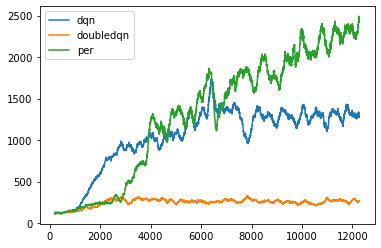

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from plot.plot_data import MultiRunData, SingleRunData


smoothing_window = 200  # set as 0 for no smoothing

run_data = []
for label, scores in label_to_scores.items():
    if len(scores) == 1:
        run_data.append(
            SingleRunData(scores[0], label, smoothing_window=smoothing_window)
        )
    elif len(scores) > 1:
        run_data.append(
            MultiRunData(scores, label, smoothing_window=smoothing_window)
        )

for run in run_data:
    run.plot(plt)
        
plt.legend()
plt.show()